In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, laplace, norm

try:
    from probml_utils import savefig, latexify
except:
    %pip install git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

  Cloning https://github.com/probml/probml-utils.git to /tmp/pip-req-build-f5cnghfq
  Running command git clone -q https://github.com/probml/probml-utils.git /tmp/pip-req-build-f5cnghfq
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 272 kB 12.5 MB/s 
     |████████████████████████████████| 72 kB 415 kB/s 
  Created wheel for probml-utils: filename=probml_utils-0.1.dev48+gb130363-py3-none-any.whl size=32273 sha256=4749428049fad990a2fef18c3f5a136ffe9e039367db29f69ba7e4c8c083b029
  Stored in directory: /tmp/pip-ephem-wheel-cache-rqxsy521/wheels/37/8f/cb/b845cd5de3d7f648717815f9c27bec49975bf58637a97fa6be
  Created wheel for TexSoup: filename=TexSoup-0.3.1-py3-none-any.whl size=27666 sha256=777897a59cf3d632148bf0e9569706a100869a89926e7102ebca1973633dc173
  Stored in directory: /root/.cache/pip/wheels/2b/8e/c6/7ee3f9f9776fd18c0ccb04492902ed42225b6dfab3c68f14c0
Successfully b

In [ ]:
latexify(width_scale_factor=2)

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


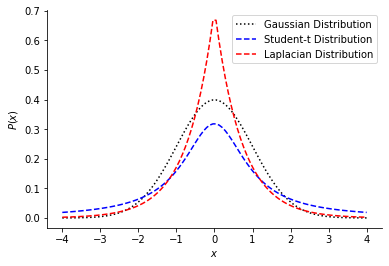

In [ ]:
def studentt(limits, number, degrees_of_freedom, save_name, fig=None, ax=None):
  x = jnp.linspace(-limits, limits, number)
  norm_pdf = norm.pdf(x, loc=0, scale=1)
  laplace_pdf = laplace.pdf(x, loc=0, scale=1 / (2 ** 0.5))
  student_t_pdf = t.pdf(x, df= degrees_of_freedom, loc=0, scale=1)

  if fig is None:
        fig, ax = plt.subplots()

  ax.plot(x, norm_pdf, 'k:')
  ax.plot(x, student_t_pdf, 'b--')
  ax.plot(x, laplace_pdf, 'r--')
  ax.set_xlabel("$x$")
  ax.set_ylabel("$P(x)$")
  ax.legend(('Gaussian Distribution', 'Student-t Distribution', 'Laplacian Distribution'))

  sns.despine()
  if len(save_name) > 0:
      savefig(save_name)
  return fig, ax

_, _ = studentt(4, 100, 1, "uniform_histogram_latexified")


In [ ]:
from ipywidgets import interact
@interact(range=(1, 10), number=(100, 1000), dof=(1,10))
def interactive_studentt(range, number, dof):
  fig, ax = studentt(range, number, dof, "")

interactive(children=(IntSlider(value=5, description='range', max=10, min=1), IntSlider(value=550, description…

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


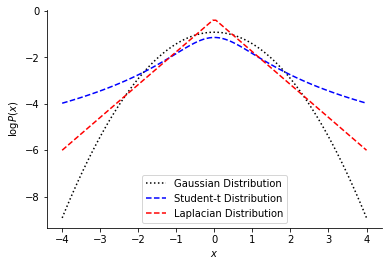

In [ ]:
def studenttlog(limits, number, degrees_of_freedom, save_name, fig=None, ax=None):
  x = jnp.linspace(-limits, limits, number)
  norm_pdf = norm.pdf(x, loc=0, scale=1)
  laplace_pdf = laplace.pdf(x, loc=0, scale=1 / (2 ** 0.5))
  student_t_pdf = t.pdf(x, df= degrees_of_freedom, loc=0, scale=1)

  if fig is None:
        fig, ax = plt.subplots()

  ax.plot(x, jnp.log(norm_pdf), 'k:')
  ax.plot(x, jnp.log(student_t_pdf), 'b--')
  ax.plot(x, jnp.log(laplace_pdf), 'r--')
  ax.set_xlabel("$x$")
  ax.set_ylabel("log$P(x)$")
  ax.legend(('Gaussian Distribution', 'Student-t Distribution', 'Laplacian Distribution'))

  sns.despine()
  if len(save_name) > 0:
      savefig(save_name)
  return fig, ax

_, _ = studenttlog(4, 100, 1, "uniform_histogram_latexified")


In [ ]:
from ipywidgets import interact
@interact(range=(1, 10), number=(100, 1000), dof=(1,10))
def interactive_studentt_log(range, number, dof):
  fig, ax = studenttlog(range, number, dof, "")

interactive(children=(IntSlider(value=5, description='range', max=10, min=1), IntSlider(value=550, description…